## Context

* For this project, you will take part in a Kaggle competition based on tabular data. The goal is to design a machine learning algorithm that, given information on a particular concertgoer experience, can automatically classify the enjoyment of that concertgoer to that concert. In this classification problem, we have 4 classes. The training dataset consists of 170,000 training examples and the testing dataset contains 30,000 test examples.

* Each training rows contains a unique ID, 18 attributes and 1 target containing the class
that needs to be predicted. You will be evaluated on the test private leaderboard mean
F1-Score.

## Instructions

* To participate in the competition, you must provide a list of predicted outputs for the
instances on the Kaggle website. To solve the problem you are encouraged to use any
classification methods you can think off, presented in the course or otherwise. Looking
into creative way to create new features from those provided may prove especially usefull
in this competition.

* The goal of this competition is to classify a particular concert experience in one of four classes: 
1. Worst Concert Ever
2. Did Not Enjoy
3. Enjoyed
4. Best Concert Ever

* To perform this task you will be given information on the band, the venue, as well as the specific concertgoers.
 
* The dataset contains information on the specific concert, the specific band, and the specific concertgoers. It is to be noted that all three of those are unchanged across all of the training data and test data. Any conclusions on the specific characteristics of a band, concert, or concertgoers will also extend to the test set.

* Unfortunately, the data-gathering step was not impeccable. One can expect some of the training attributes not always to reflect the underlying reality. However, the "Concert Experience" column has been verified and is 100% accurate.

In [314]:
# Import packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


# Load data
train_data = pd.read_csv('./data/train.csv')
test_data = pd.read_csv('./data/test.csv')

In [315]:
train_data

,Id,Band Name,Band Genre,Band Country of Origin,Band Debut,Concert ID,Concert Attendance,Inside Venue,Rain,Seated,Personnality Trait 1,Personnality Trait 2,Personnality Trait 3,Personnality Trait 4,Concert Goer Age,Concert Goer ID,Height (cm),Concert Goer Country of Origin,Concert Enjoyment
0,ConcertExperience_180106,Teenage Crazy Blue Knickers,Indie/Alt Rock,United States of America (USA),1976.0,900.0,2980.0,False,False,NaN,0.330843,-0.958408,-0.943548,-1.636806,29.0,concert_goer_1985,140.0,Paraguay,Did Not Enjoy
1,ConcertExperience_146268,Beyond Devon,Pop Music,United States of America (USA),1968.0,731.0,54.0,True,False,True,-2.069449,0.017777,-1.910675,0.610265,43.0,concert_goer_1874,158.0,United Kingdom (UK),Enjoyed
2,ConcertExperience_128743,Ron Talent,Rock n Roll,Canada,1955.0,NaN,162754.0,False,False,True,-0.484268,1.968772,-0.064167,-1.260871,68.0,concert_goer_442,159.0,United States of America (USA),Did Not Enjoy
3,ConcertExperience_140839,Devon Revival,RnB,United States of America (USA),1992.0,704.0,8103.0,False,True,False,-0.858054,1.022827,-0.348389,-1.147251,17.0,concert_goer_1149,150.0,Canada,Worst Concert Ever
4,ConcertExperience_19149,Beyond Devon,Pop Music,United States of America (USA),1968.0,95.0,54.0,False,False,False,-0.793029,-1.166528,-0.043766,0.969661,59.0,concert_goer_930,166.0,United Kingdom (UK),Did Not Enjoy
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
169995,ConcertExperience_14055,Crazy Joystick Cult,RnB,Canada,1985.0,70.0,162754.0,True,False,False,-0.095021,0.175175,0.914245,0.357359,50.0,concert_goer_707,180.0,United States of America (USA),Did Not Enjoy
169996,ConcertExperience_192792,Crazy Joystick Cult,RnB,Canada,1985.0,963.0,54.0,False,False,False,-0.733719,-0.285776,-0.323312,0.641180,71.0,concert_goer_1373,143.0,Bulgaria,Worst Concert Ever
169997,ConcertExperience_152942,"Why Frogs, Why?",Heavy Metal,Canada,2005.0,764.0,54.0,False,False,False,0.744969,-0.965547,1.020598,1.027389,27.0,concert_goer_1286,176.0,Canada,Did Not Enjoy
169998,ConcertExperience_138957,Twilight of the Joystick Gods,Hip Hop/Rap,United States of America (USA),1995.0,694.0,22026.0,False,True,True,0.821976,0.351411,0.175762,1.455654,39.0,concert_goer_1845,176.0,Canada,Did Not Enjoy


In [316]:
test_data

,Id,Band Name,Band Genre,Band Country of Origin,Band Debut,Concert ID,Concert Attendance,Inside Venue,Rain,Seated,Personnality Trait 1,Personnality Trait 2,Personnality Trait 3,Personnality Trait 4,Concert Goer Age,Concert Goer ID,Height (cm),Concert Goer Country of Origin
0,ConcertExperience_70055,The Crazy Heroes of Devon,Rock n Roll,United States of America (USA),1980.0,350.0,2980.0,True,False,True,1.065107,0.057660,0.249639,-0.933976,74.0,concert_goer_1587,165.0,United States of America (USA)
1,ConcertExperience_34799,Joystick for the Jockies,Hip Hop/Rap,United States of America (USA),2014.0,173.0,8103.0,True,True,False,-0.886947,0.801365,0.525624,0.176655,29.0,concert_goer_293,151.0,Kenya
2,ConcertExperience_100410,Puddle of Joystick,Rock n Roll,Canada,2010.0,502.0,2980.0,True,True,False,0.744700,-0.797531,-0.034166,-0.226052,27.0,concert_goer_1068,146.0,Canada
3,ConcertExperience_106446,Flight of the Knickers,NaN,Canada,2014.0,532.0,22026.0,True,False,False,-0.134180,-0.361512,0.969404,-2.341205,38.0,concert_goer_1315,183.0,United States of America (USA)
4,ConcertExperience_127249,Devon Revival,RnB,United States of America (USA),1992.0,636.0,2980.0,False,False,False,1.407366,-0.084155,-0.673233,1.733714,21.0,concert_goer_1777,177.0,Fiji
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,ConcertExperience_82288,Joystick of the Big Knickers,Hip Hop/Rap,United States of America (USA),1979.0,411.0,2980.0,True,False,False,-0.421714,-1.549670,-0.351770,0.132489,42.0,concert_goer_1710,178.0,United States of America (USA)
29996,ConcertExperience_27139,Big Division,Hip Hop/Rap,United States of America (USA),1978.0,135.0,8103.0,True,False,False,0.615087,-0.047092,0.339228,0.820159,37.0,concert_goer_1758,186.0,Canada
29997,ConcertExperience_197434,Crazyplay,Pop Music,United States of America (USA),1995.0,987.0,8103.0,False,False,True,-1.396551,-0.508627,-1.692584,1.640931,45.0,concert_goer_1481,158.0,Greece
29998,ConcertExperience_166029,Lord of the Crazy Frogs,RnB,United States of America (USA),1968.0,830.0,8103.0,False,True,False,0.168073,-0.785460,0.898273,1.608389,36.0,concert_goer_1461,170.0,United Kingdom (UK)


In [317]:
train_data.nunique()

Id                                170000
Band Name                             54
Band Genre                             8
Band Country of Origin                 4
Band Debut                            34
Concert ID                          1000
Concert Attendance                    18
Inside Venue                           2
Rain                                   2
Seated                                 2
Personnality Trait 1                2000
Personnality Trait 2                2163
Personnality Trait 3                2205
Personnality Trait 4                2000
Concert Goer Age                      61
Concert Goer ID                     2000
Height (cm)                           51
Concert Goer Country of Origin       152
Concert Enjoyment                      4
dtype: int64

In [318]:
test_data.nunique()

Id                                30000
Band Name                            54
Band Genre                            8
Band Country of Origin                4
Band Debut                           34
Concert ID                         1000
Concert Attendance                   18
Inside Venue                          2
Rain                                  2
Seated                                2
Personnality Trait 1               2000
Personnality Trait 2               2037
Personnality Trait 3               2043
Personnality Trait 4               2000
Concert Goer Age                     61
Concert Goer ID                    2000
Height (cm)                          51
Concert Goer Country of Origin      152
dtype: int64

In [319]:
# Observe correlation between personnalities

train_data[['Personnality Trait 1', 'Personnality Trait 2', 'Personnality Trait 3', 'Personnality Trait 4']].corr()


,Personnality Trait 1,Personnality Trait 2,Personnality Trait 3,Personnality Trait 4
Personnality Trait 1,1.000000,0.005117,-0.017076,-0.012334
Personnality Trait 2,0.005117,1.000000,-0.001677,0.002682
Personnality Trait 3,-0.017076,-0.001677,1.000000,0.027111
Personnality Trait 4,-0.012334,0.002682,0.027111,1.000000


In [320]:
# Convert "Insert Band Name" "Insert Band Genre" "Insert Band Country of Origin" to NaN

train_data = train_data.replace({'Insert Band Name':np.nan, 'Insert Band Genre':np.nan, 'Insert Band Country of Origin':np.nan})
test_data = test_data.replace({'Insert Band Name':np.nan, 'Insert Band Genre':np.nan, 'Insert Band Country of Origin':np.nan})

In [321]:
# Make a function for this
def replaceSimilarities(category, data):
    # Make a table for all category and count the number of "Best Concert Ever", "Enjoyed" "Did not enjoy" and "Worst Concert Ever"
    category_table = train_data[category].unique()
    category_table = pd.DataFrame(category_table, columns=[category])
    category_table['Best Concert Ever'] = 0
    category_table['Enjoyed'] = 0
    category_table['Did Not Enjoy'] = 0
    category_table['Worst Concert Ever'] = 0
    for i in range(len(category_table)):
        category_table['Best Concert Ever'][i] = len(train_data[(train_data[category] == category_table[category][i]) & (train_data['Concert Enjoyment'] == 'Best Concert Ever')])
        category_table['Enjoyed'][i] = len(train_data[(train_data[category] == category_table[category][i]) & (train_data['Concert Enjoyment'] == 'Enjoyed')])
        category_table['Did Not Enjoy'][i] = len(train_data[(train_data[category] == category_table[category][i]) & (train_data['Concert Enjoyment'] == 'Did Not Enjoy')])
        category_table['Worst Concert Ever'][i] = len(train_data[(train_data[category] == category_table[category][i]) & (train_data['Concert Enjoyment'] == 'Worst Concert Ever')])
    
    # Calculate the similarity between 2 category based on the number of "Best Concert Ever", "Enjoyed" "Did not enjoy" and "Worst Concert Ever"
    # The similarity is calculated by the sum of the absolute difference between the number of "Best Concert Ever", "Enjoyed" "Did not enjoy" and "Worst Concert Ever"
    # The smaller the similarity, the more similar the 2 category are
    # The similarity is stored in a matrix
    similarity = np.zeros((len(category_table), len(category_table)))
    for i in range(len(category_table)):
        for j in range(len(category_table)):
            similarity[i][j] = abs(category_table['Best Concert Ever'][i] - category_table['Best Concert Ever'][j]) + abs(category_table['Enjoyed'][i] - category_table['Enjoyed'][j]) + abs(category_table['Did Not Enjoy'][i] - category_table['Did Not Enjoy'][j]) + abs(category_table['Worst Concert Ever'][i] - category_table['Worst Concert Ever'][j])
    
    # Create a dictionnary that assigns each category to a number depending on the similarity with the other category
    # The smaller the similarity, the more similar the 2 category are
    # The category with the smallest similarity with the other category is assigned to 0, the second smallest to 1, etc.
    # The dictionnary is used to replace the category by the number assigned to it
    category_dict = {}
    for i in range(len(category_table)):
        category_dict[category_table[category][i]] = np.argmin(similarity[i])
    
    # Replace the category by the number assigned to it in train_data and test_data
    data[category] = data[category].replace(category_dict)
    return data

In [322]:
train_data = replaceSimilarities('Band Genre', train_data)

C:\Users\shahr\AppData\Local\Temp\ipykernel_22632\2133008489.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  category_table['Best Concert Ever'][i] = len(train_data[(train_data[category] == category_table[category][i]) & (train_data['Concert Enjoyment'] == 'Best Concert Ever')])
C:\Users\shahr\AppData\Local\Temp\ipykernel_22632\2133008489.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  category_table['Enjoyed'][i] = len(train_data[(train_data[category] == category_table[category][i]) & (train_data['Concert Enjoyment'] == 'Enjoyed')])
C:\Users\shahr\AppData\Local\Temp\ipykernel_22632\2133008489.py:13: SettingW

In [323]:
train_data = replaceSimilarities('Band Country of Origin', train_data)

C:\Users\shahr\AppData\Local\Temp\ipykernel_22632\2133008489.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  category_table['Best Concert Ever'][i] = len(train_data[(train_data[category] == category_table[category][i]) & (train_data['Concert Enjoyment'] == 'Best Concert Ever')])
C:\Users\shahr\AppData\Local\Temp\ipykernel_22632\2133008489.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  category_table['Enjoyed'][i] = len(train_data[(train_data[category] == category_table[category][i]) & (train_data['Concert Enjoyment'] == 'Enjoyed')])
C:\Users\shahr\AppData\Local\Temp\ipykernel_22632\2133008489.py:13: SettingW

In [324]:
train_data = replaceSimilarities('Band Name', train_data)


C:\Users\shahr\AppData\Local\Temp\ipykernel_22632\2133008489.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  category_table['Best Concert Ever'][i] = len(train_data[(train_data[category] == category_table[category][i]) & (train_data['Concert Enjoyment'] == 'Best Concert Ever')])
C:\Users\shahr\AppData\Local\Temp\ipykernel_22632\2133008489.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  category_table['Enjoyed'][i] = len(train_data[(train_data[category] == category_table[category][i]) & (train_data['Concert Enjoyment'] == 'Enjoyed')])
C:\Users\shahr\AppData\Local\Temp\ipykernel_22632\2133008489.py:13: SettingW

In [325]:
train_data = replaceSimilarities('Concert Goer Country of Origin', train_data)


C:\Users\shahr\AppData\Local\Temp\ipykernel_22632\2133008489.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  category_table['Best Concert Ever'][i] = len(train_data[(train_data[category] == category_table[category][i]) & (train_data['Concert Enjoyment'] == 'Best Concert Ever')])
C:\Users\shahr\AppData\Local\Temp\ipykernel_22632\2133008489.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  category_table['Enjoyed'][i] = len(train_data[(train_data[category] == category_table[category][i]) & (train_data['Concert Enjoyment'] == 'Enjoyed')])
C:\Users\shahr\AppData\Local\Temp\ipykernel_22632\2133008489.py:13: SettingW

In [326]:
# train_data = replaceSimilarities('Concert Goer ID', train_data)

In [327]:
# remove nan value from dataframe
train_data = train_data.dropna()
# test_data = test_data.dropna()

train_data = train_data[train_data['Band Genre'] != 'Insert Band Genre']
train_data = train_data[train_data['Band Country of Origin'] != 'Insert Band Country of Origin']
train_data = train_data[train_data['Band Name'] != 'Insert Band Name']


test_data = test_data[test_data['Band Genre'] != 'Insert Band Genre']
test_data = test_data[test_data['Band Country of Origin'] != 'Insert Band Country of Origin']
test_data = test_data[test_data['Band Name'] != 'Insert Band Name']


genre_dictionary = dict(zip(train_data['Band Genre'].unique(), range(len(train_data['Band Genre'].unique()))))
train_data = train_data.replace({'Band Genre':genre_dictionary})
test_data = test_data.replace({'Band Genre':genre_dictionary})

countries_dictionary = dict(zip(train_data['Band Country of Origin'].unique(), range(len(train_data['Band Country of Origin'].unique()))))
train_data = train_data.replace({'Band Country of Origin':countries_dictionary})
test_data = test_data.replace({'Band Country of Origin':countries_dictionary})

names_dictionary = dict(zip(train_data['Band Name'].unique(), range(len(train_data['Band Name'].unique()))))
train_data = train_data.replace({'Band Name':names_dictionary})
test_data = test_data.replace({'Band Name':names_dictionary})

concert_goer_country_dictionary = dict(zip(train_data['Concert Goer Country of Origin'].unique(), range(len(train_data['Concert Goer Country of Origin'].unique()))))
train_data = train_data.replace({'Concert Goer Country of Origin':concert_goer_country_dictionary})
test_data = test_data.replace({'Concert Goer Country of Origin':concert_goer_country_dictionary})



concert_goer_ID_dictionary = dict(zip(train_data['Concert Goer ID'].unique(), range(len(train_data['Concert Goer ID'].unique()))))
train_data = train_data.replace({'Concert Goer ID':concert_goer_ID_dictionary})
#test_data = test_data.replace({'Concert Goer ID':concert_goer_ID_dictionary})


enjoyment_dictionary = {"Worst Concert Ever":0, "Did Not Enjoy":1, "Enjoyed":2, "Best Concert Ever":3}
train_data = train_data.replace({'Concert Enjoyment':enjoyment_dictionary})

# Remove "ConcertExperience" in Id column
train_data['Id'] = train_data['Id'].str.replace('ConcertExperience_', '')
train_data['Id'] = train_data['Id'].astype(int)
#test_data['Id'] = test_data['Id'].str.replace('ConcertExperience_', '')


In [328]:
# Convert all false value to 0 and all true value to 1
train_data = train_data.replace({False: 0, True: 1})

In [329]:
train_data

,Id,Band Name,Band Genre,Band Country of Origin,Band Debut,Concert ID,Concert Attendance,Inside Venue,Rain,Seated,Personnality Trait 1,Personnality Trait 2,Personnality Trait 3,Personnality Trait 4,Concert Goer Age,Concert Goer ID,Height (cm),Concert Goer Country of Origin,Concert Enjoyment
1,146268,0,0.0,0.0,1968.0,731.0,54.0,1,0,1,-2.069449,0.017777,-1.910675,0.610265,43.0,0,158.0,0,2
3,140839,1,1.0,0.0,1992.0,704.0,8103.0,0,1,0,-0.858054,1.022827,-0.348389,-1.147251,17.0,1,150.0,1,0
4,19149,0,0.0,0.0,1968.0,95.0,54.0,0,0,0,-0.793029,-1.166528,-0.043766,0.969661,59.0,2,166.0,0,1
5,125567,2,0.0,1.0,1998.0,627.0,540000.0,0,0,1,0.091389,-0.691694,0.603638,0.500926,43.0,3,166.0,1,3
7,82419,3,2.0,0.0,1980.0,412.0,54.0,1,0,0,0.755175,1.753481,0.942377,-0.657241,67.0,4,171.0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
169995,14055,18,1.0,1.0,1985.0,70.0,162754.0,1,0,0,-0.095021,0.175175,0.914245,0.357359,50.0,554,180.0,4,1
169996,192792,18,1.0,1.0,1985.0,963.0,54.0,0,0,0,-0.733719,-0.285776,-0.323312,0.641180,71.0,1372,143.0,16,0
169997,152942,16,4.0,1.0,2005.0,764.0,54.0,0,0,0,0.744969,-0.965547,1.020598,1.027389,27.0,146,176.0,1,1
169998,138957,17,3.0,0.0,1995.0,694.0,22026.0,0,1,1,0.821976,0.351411,0.175762,1.455654,39.0,655,176.0,1,1


In [330]:
train_data.describe()

,Id,Band Name,Band Genre,Band Country of Origin,Band Debut,Concert ID,Concert Attendance,Inside Venue,Rain,Seated,Personnality Trait 1,Personnality Trait 2,Personnality Trait 3,Personnality Trait 4,Concert Goer Age,Concert Goer ID,Height (cm),Concert Goer Country of Origin,Concert Enjoyment
count,159189.000000,159189.000000,159189.000000,159189.000000,159189.000000,159189.000000,1.591890e+05,159189.000000,159189.000000,159189.000000,159189.000000,159189.000000,159189.000000,159189.000000,159189.000000,159189.000000,159189.000000,159189.000000,159189.000000
mean,99961.889754,26.451445,2.575178,0.395461,1985.888560,499.311937,2.721690e+05,0.495285,0.198783,0.498382,0.029410,-9.172953,-0.017472,0.002587,46.973001,995.391717,164.665925,11.823405,1.500883
std,57712.875838,15.836037,1.673829,0.631682,16.371913,288.564277,1.634031e+07,0.499979,0.399085,0.499999,0.991807,3188.315243,1.005318,1.006254,17.468418,577.110484,14.364653,28.204875,0.806074
min,0.000000,0.000000,0.000000,0.000000,1955.000000,0.000000,5.400000e+01,0.000000,0.000000,0.000000,-3.124408,-293861.500146,-3.275108,-3.287787,16.000000,0.000000,140.000000,0.000000,0.000000
25%,49944.000000,13.000000,1.000000,0.000000,1976.000000,249.000000,4.030000e+02,0.000000,0.000000,0.000000,-0.638873,-0.689943,-0.711015,-0.698374,32.000000,496.000000,152.000000,1.000000,1.000000
50%,100004.000000,26.000000,3.000000,0.000000,1988.000000,500.000000,2.980000e+03,0.000000,0.000000,0.000000,0.022664,-0.021836,0.007932,0.014184,47.000000,996.000000,164.000000,1.000000,2.000000
75%,149980.000000,40.000000,4.000000,1.000000,1998.000000,749.000000,2.202600e+04,1.000000,0.000000,1.000000,0.697311,0.648032,0.680300,0.697340,63.000000,1495.000000,177.000000,4.000000,2.000000
max,199999.000000,53.000000,7.000000,3.000000,2014.000000,999.000000,1.627540e+09,1.000000,1.000000,1.000000,3.628828,325834.016795,3.308810,3.830923,76.000000,1999.000000,190.000000,152.000000,3.000000


In [331]:
# Convert to numpy array
train_data_np = train_data.to_numpy(dtype = np.float64)

In [332]:
from sklearn.metrics import f1_score

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import BaggingClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from xgboost import XGBClassifier

from sklearn.model_selection import train_test_split

# train model using "Concert Enjoyment" column as output
X = train_data_np[:,:-1]
# output is "Concert Enjoyment" column
y = train_data_np[:,-1]

# Process test data
val_size = 0.2
seed = 9
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=val_size, random_state=seed)

### Normalize "Band Debut", "Concert ID", "Concert Attendance", "Personnality Trait 1", "Personnality Trait 2", "Personnality Trait 3", "Personnality Trait 4", "Concert Goer Age" "Concert Goer ID", "Height (cm)"

In [333]:
def d_normalize(df):
    df['Band Debut'] = (df['Band Debut'] - df['Band Debut'].mean()) / df['Band Debut'].std()
    df['Concert ID'] = (df['Concert ID'] - df['Concert ID'].mean()) / df['Concert ID'].std()
    df['Concert Attendance'] = (df['Concert Attendance'] - df['Concert Attendance'].mean()) / df['Concert Attendance'].std()
    df['Personnality Trait 1'] = (df['Personnality Trait 1'] - df['Personnality Trait 1'].mean()) / df['Personnality Trait 1'].std()
    df['Personnality Trait 2'] = (df['Personnality Trait 2'] - df['Personnality Trait 2'].mean()) / df['Personnality Trait 2'].std()
    df['Personnality Trait 3'] = (df['Personnality Trait 3'] - df['Personnality Trait 3'].mean()) / df['Personnality Trait 3'].std()
    df['Personnality Trait 4'] = (df['Personnality Trait 4'] - df['Personnality Trait 4'].mean()) / df['Personnality Trait 4'].std()
    df['Concert Goer Age'] = (df['Concert Goer Age'] - df['Concert Goer Age'].mean()) / df['Concert Goer Age'].std()
    df['Concert Goer ID'] = (df['Concert Goer ID'] - df['Concert Goer ID'].mean()) / df['Concert Goer ID'].std()
    df['Height (cm)'] = (df['Height (cm)'] - df['Height (cm)'].mean()) / df['Height (cm)'].std()
    return df

In [334]:
train_data_norm = pd.DataFrame(X_train)
test_data_norm = pd.DataFrame(X_test)

In [335]:
# Normalise all the columns of the train_data dataframe
# import normalize from sklearn.preprocessing
from sklearn.preprocessing import normalize

train_data_norm

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17
0,47033.0,21.0,3.0,0.0,2014.0,235.0,403.0,1.0,0.0,0.0,0.918042,0.304303,0.358986,0.921951,73.0,1827.0,167.0,1.0
1,12206.0,1.0,1.0,0.0,1992.0,61.0,1096.0,1.0,0.0,0.0,-1.079698,0.788697,0.490800,-0.028397,40.0,263.0,165.0,4.0
2,54822.0,51.0,5.0,0.0,2005.0,274.0,22026.0,0.0,0.0,1.0,-1.248772,1.265766,0.586171,0.054289,58.0,977.0,173.0,1.0
3,12594.0,36.0,4.0,2.0,2008.0,62.0,54.0,0.0,0.0,1.0,0.423815,0.390687,-0.256644,0.895601,61.0,501.0,148.0,1.0
4,155545.0,17.0,3.0,0.0,1995.0,777.0,54.0,1.0,0.0,1.0,1.250450,0.421130,-0.044663,1.056139,22.0,959.0,161.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
127346,55507.0,20.0,4.0,0.0,1969.0,277.0,2980.0,0.0,0.0,0.0,-0.395662,-0.521751,-1.810155,0.152255,35.0,1571.0,162.0,4.0
127347,33774.0,35.0,2.0,0.0,1983.0,168.0,8103.0,0.0,0.0,1.0,0.808210,1.855136,-0.599020,0.005541,17.0,415.0,144.0,27.0
127348,100601.0,51.0,5.0,0.0,2005.0,503.0,54.0,1.0,0.0,1.0,-1.024078,1.010737,-1.182951,0.076068,40.0,139.0,158.0,1.0
127349,81017.0,34.0,2.0,1.0,2010.0,405.0,1096.0,1.0,0.0,0.0,1.179096,-0.662585,-1.993076,-0.624454,42.0,1857.0,162.0,1.0


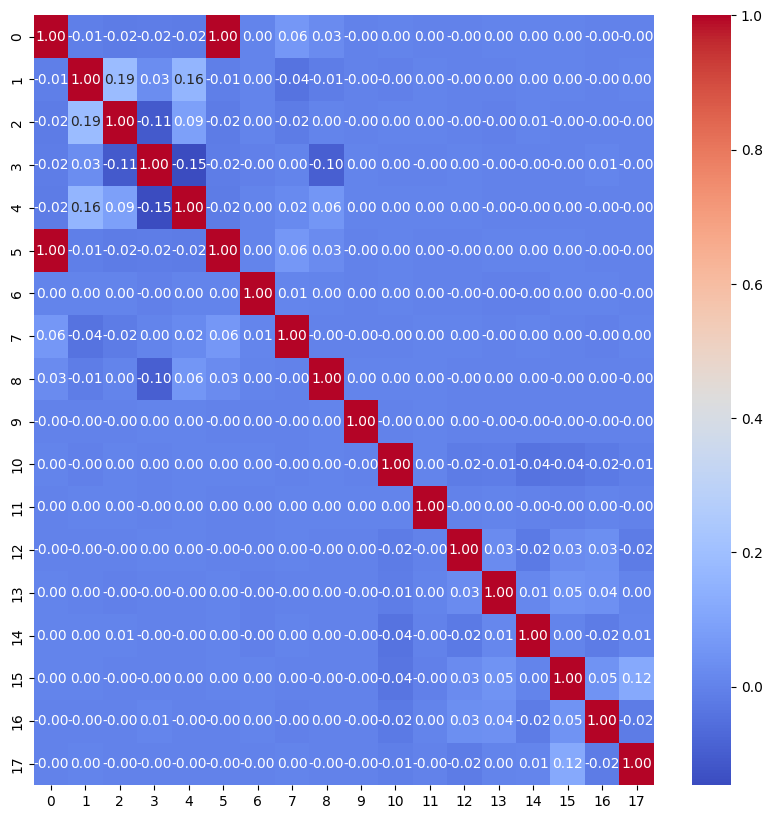

In [336]:
# Get correlation between all columns and visualize it in a heatmap
import seaborn as sns

corr = train_data_norm.corr()
plt.figure(figsize=(10,10))
sns.heatmap(corr, annot=True, fmt='.2f', cmap='coolwarm')
plt.show()

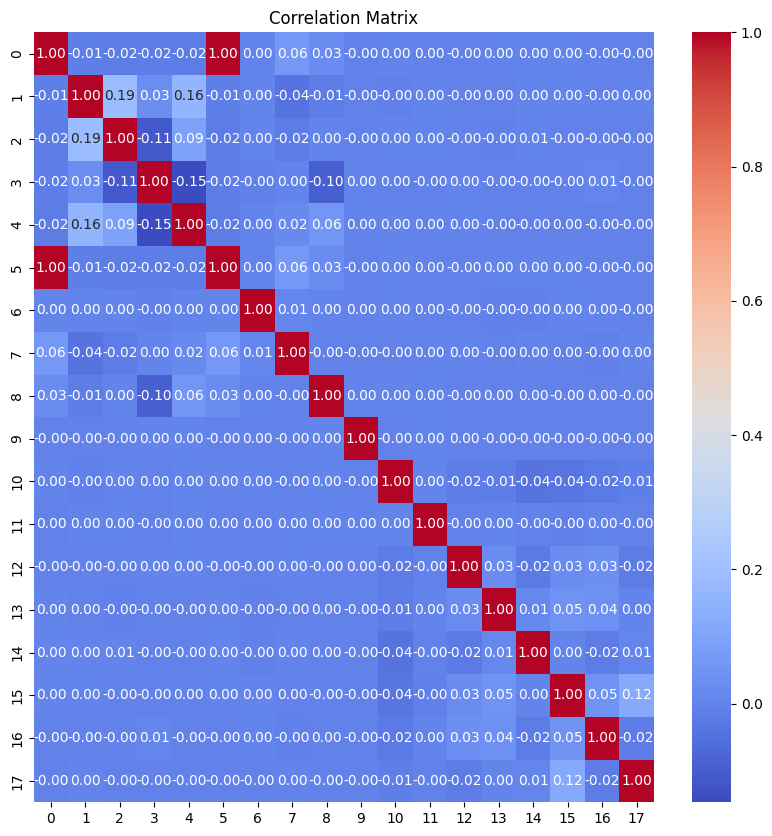

In [337]:
corr = train_data_norm.corr()
# display correlation matrix in a heatmap
plt.figure(figsize=(10,10))
plt.title('Correlation Matrix')
plt.xlabel('Features')
plt.ylabel('Features')
sns.heatmap(corr, annot=True, fmt='.2f', cmap='coolwarm')
plt.show()

# Model selection

In [338]:
clf = XGBClassifier()
clf.fit(train_data_norm, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, feature_types=None, gamma=0, gpu_id=-1,
              grow_policy='depthwise', importance_type=None,
              interaction_constraints='', learning_rate=0.300000012,
              max_bin=256, max_cat_threshold=64, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_parallel_tree=1, objective='multi:softprob',
              predictor='auto', ...)

In [339]:

f1_score(y_test, clf.predict(test_data_norm), average='micro')

0.6655568817136754

[0.0191594  0.12968221 0.10829692 0.13273063 0.07986314 0.
 0.01759029 0.14482088 0.1347176  0.07959795 0.01124585 0.01133926
 0.01487757 0.01156607 0.03928966 0.01106083 0.01091122 0.04325046]


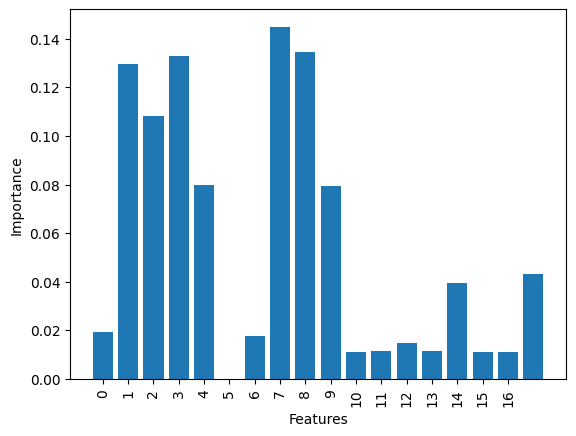

In [340]:
print(clf.feature_importances_)
feature_importance = clf.feature_importances_

# plot feature importance
# xticks every 1
from matplotlib import pyplot
plt.xlabel('Features')
plt.ylabel('Importance')
plt.xticks(rotation=90)
# 1 tick at every bar
plt.xticks(np.arange(0, 17, 1))
pyplot.bar(range(len(clf.feature_importances_)), clf.feature_importances_)
pyplot.show()

In [341]:
'''
# get the index of each column which has less than 0.012 importance
idx = np.where(clf.feature_importances_ < 0.012)
# drop the columns which has less than 0.012 importance
train_data_norm = train_data_norm.drop(train_data_norm.columns[idx], axis=1)
test_data_norm = test_data_norm.drop(test_data_norm.columns[idx], axis=1)
'''

'\n# get the index of each column which has less than 0.012 importance\nidx = np.where(clf.feature_importances_ < 0.012)\n# drop the columns which has less than 0.012 importance\ntrain_data_norm = train_data_norm.drop(train_data_norm.columns[idx], axis=1)\ntest_data_norm = test_data_norm.drop(test_data_norm.columns[idx], axis=1)\n'

In [342]:
# Get the index of the least important feature and drop it
idx = np.where(feature_importance == min(feature_importance))
train_data_norm = train_data_norm.drop(train_data_norm.columns[idx], axis=1)
test_data_norm = test_data_norm.drop(test_data_norm.columns[idx], axis=1)
# drop min(clf.feature_importances_) from clf.feature_importances_
feature_importance = np.delete(feature_importance, idx)

In [343]:
# import GridSearchCV
from sklearn.model_selection import GridSearchCV

# A parameter grid for XGBoost
params = {
    "n_estimators": [500, 600, 700, 800, 900, 1000, 1500, 2000],
    "max_depth": [3, 4, 5, 6, 7],
    "learning_rate": [0.01,0.1, 0.2, 0.3],
    "colsample_bytree": [0.5, 0.6, 0.7, 0.8, 0.9, 1],
}

In [344]:
grid = GridSearchCV(XGBClassifier(), params, cv=5, n_jobs=-1, verbose=1)
grid.fit(train_data_norm, y_train)
# print best f1 score and best parameters
print(grid.best_score_)
print(grid.best_params_)
clf = grid.best_estimator_
f1_score(y_test, clf.predict(test_data_norm), average='micro')

Fitting 5 folds for each of 960 candidates, totalling 4800 fits


In [ ]:
# Get the index of the least important feature and drop it
idx = np.where(feature_importance == min(feature_importance))
train_data_norm = train_data_norm.drop(train_data_norm.columns[idx], axis=1)
test_data_norm = test_data_norm.drop(test_data_norm.columns[idx], axis=1)
# drop min(clf.feature_importances_) from clf.feature_importances_
feature_importance = np.delete(feature_importance, idx)

# use softmax to get the probability of each class
grid = GridSearchCV(XGBClassifier(), params, cv=5, n_jobs=-1, verbose=1)
grid.fit(train_data_norm, y_train)
# print best f1 score and best parameters
print(grid.best_score_)
print(grid.best_params_)
clf = grid.best_estimator_
f1_score(y_test, clf.predict(test_data_norm), average='micro')

0.669357371694202

In [ ]:
# Get the index of the least important feature and drop it
idx = np.where(feature_importance == min(feature_importance))
train_data_norm = train_data_norm.drop(train_data_norm.columns[idx], axis=1)
test_data_norm = test_data_norm.drop(test_data_norm.columns[idx], axis=1)
# drop min(clf.feature_importances_) from clf.feature_importances_
feature_importance = np.delete(feature_importance, idx)

grid = GridSearchCV(XGBClassifier(), params, cv=5, n_jobs=-1, verbose=1)
grid.fit(train_data_norm, y_train)
# print best f1 score and best parameters
print(grid.best_score_)
print(grid.best_params_)
clf = grid.best_estimator_
f1_score(y_test, clf.predict(test_data_norm), average='micro')

0.6711790941642063

In [ ]:
# Get the index of the least important feature and drop it
idx = np.where(feature_importance == min(feature_importance))
train_data_norm = train_data_norm.drop(train_data_norm.columns[idx], axis=1)
test_data_norm = test_data_norm.drop(test_data_norm.columns[idx], axis=1)
# drop min(clf.feature_importances_) from clf.feature_importances_
feature_importance = np.delete(feature_importance, idx)

grid = GridSearchCV(XGBClassifier(), params, cv=5, n_jobs=-1, verbose=1)
grid.fit(train_data_norm, y_train)
# print best f1 score and best parameters
print(grid.best_score_)
print(grid.best_params_)
clf = grid.best_estimator_
f1_score(y_test, clf.predict(test_data_norm), average='micro')

KeyboardInterrupt: 

In [ ]:
# Get the index of the least important feature and drop it
idx = np.where(feature_importance == min(feature_importance))
train_data_norm = train_data_norm.drop(train_data_norm.columns[idx], axis=1)
test_data_norm = test_data_norm.drop(test_data_norm.columns[idx], axis=1)
# drop min(clf.feature_importances_) from clf.feature_importances_
feature_importance = np.delete(feature_importance, idx)

grid = GridSearchCV(XGBClassifier(), params, cv=5, n_jobs=-1, verbose=1)
grid.fit(train_data_norm, y_train)
# print best f1 score and best parameters
print(grid.best_score_)
print(grid.best_params_)
clf = grid.best_estimator_
f1_score(y_test, clf.predict(test_data_norm), average='micro')

0.6709278220993781

In [ ]:
# Get the index of the least important feature and drop it
idx = np.where(feature_importance == min(feature_importance))
train_data_norm = train_data_norm.drop(train_data_norm.columns[idx], axis=1)
test_data_norm = test_data_norm.drop(test_data_norm.columns[idx], axis=1)
# drop min(clf.feature_importances_) from clf.feature_importances_
feature_importance = np.delete(feature_importance, idx)

grid = GridSearchCV(XGBClassifier(), params, cv=5, n_jobs=-1, verbose=1)
grid.fit(train_data_norm, y_train)
# print best f1 score and best parameters
print(grid.best_score_)
print(grid.best_params_)
clf = grid.best_estimator_
f1_score(y_test, clf.predict(test_data_norm), average='micro')

0.6709592311074817

In [ ]:
feature_importance

array([0.0191594 , 0.12968221, 0.10829692, 0.13273063, 0.07986314,
       0.01759029, 0.14482088, 0.1347176 , 0.07959795, 0.01487757,
       0.03928966, 0.04325046], dtype=float32)

In [187]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train = pd.DataFrame(scaler.fit_transform(X_train))
X_test = pd.DataFrame(scaler.transform(X_test))

In [188]:
from imblearn.over_sampling import SMOTE
sm = SMOTE(random_state=42)

X_train_res, y_train_res = sm.fit_resample(X_train, y_train)

In [190]:
# print the value counts of y_train_res
print(pd.Series(y_train_res).value_counts())

1.0    50988
2.0    50988
0.0    50988
3.0    50988
dtype: int64


### XGBoost

In [51]:
# XGBoost
from xgboost import XGBClassifier

def xgboost(X_train, X_test, y_train, y_test, n_estimators, max_depth, learning_rate):
    clf = XGBClassifier(n_estimators = n_estimators, max_depth = max_depth, learning_rate = learning_rate)
    clf.fit(X_train, y_train)
    model_prediction = clf.predict(X_test)
    return f1_score(y_test, model_prediction, average = 'micro')

In [52]:

f1_scores_xgb = []
n_estimators_values = [1000, 1500, 2000, 2500, 3000, 3500]
max_depth_values = [4, 5, 6, 7]

for n_estimators in n_estimators_values:
    for max_depth in max_depth_values:
        f1_scores_xgb.append(xgboost(X_train, X_test, y_train, y_test, n_estimators, max_depth, 0.1))

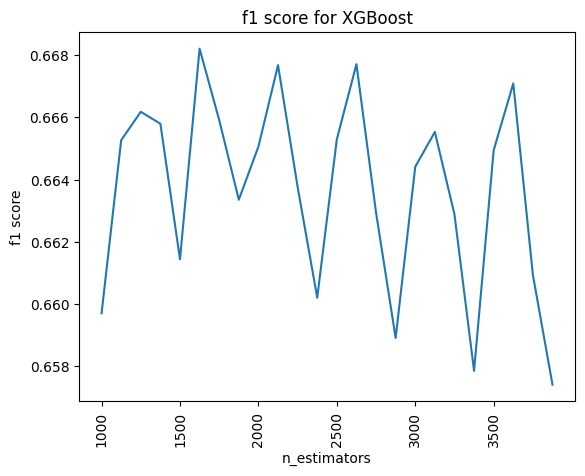

XGBoost:  0.6682058823529412  with n_estimators =  1500  and max_depth =  5


In [53]:
plt.title("f1 score for XGBoost")
plt.ylabel("f1 score")
plt.xlabel("n_estimators")
plt.xticks(np.arange(0, len(n_estimators_values)*len(max_depth_values), len(max_depth_values)), n_estimators_values, rotation = 90)
plt.plot(f1_scores_xgb)
plt.show()

print("XGBoost: ", max(f1_scores_xgb), " with n_estimators = ", n_estimators_values[f1_scores_xgb.index(max(f1_scores_xgb))//len(max_depth_values)], " and max_depth = ", max_depth_values[f1_scores_xgb.index(max(f1_scores_xgb))%len(max_depth_values)])

In [406]:
f1_scores_xgb2 = []

In [407]:
n_estimators_values = [50, 60, 70, 80, 90, 100, 110, 120, 130, 140, 150, 160, 170, 180, 190, 200]
max_depth_values = [5]

for n_estimators in n_estimators_values:
    for max_depth in max_depth_values:
        f1_scores_xgb2.append(xgboost(X_train_res, X_test, y_train_res, y_test, n_estimators, max_depth, 0.1))

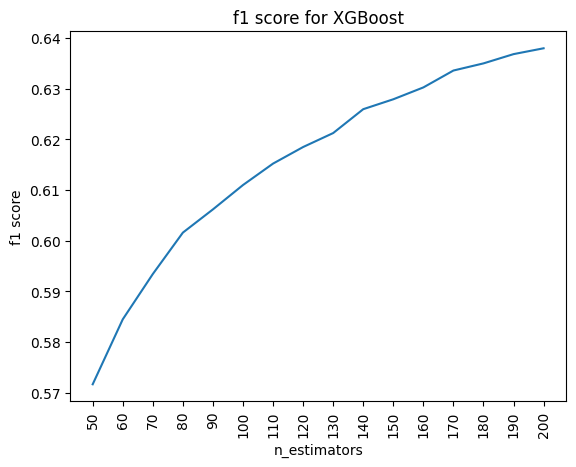

XGBoost:  0.637942637397853 with index =  15


In [408]:
plt.title("f1 score for XGBoost")
plt.ylabel("f1 score")
plt.xlabel("n_estimators")
plt.xticks(np.arange(0, len(n_estimators_values)*len(max_depth_values), len(max_depth_values)), n_estimators_values, rotation = 90)
plt.plot(f1_scores_xgb2)
plt.show()

print("XGBoost: ", max(f1_scores_xgb2), "with index = ", f1_scores_xgb2.index(max(f1_scores_xgb2)))

# Test set predictions

In [286]:
# Random forst with nb_estimators = 130 and max_depth = 20

best_model = XGBClassifier(n_estimators = 1500, max_depth = 5, learning_rate = 0.1)
best_model.fit(X_train, y_train)
y_pred = best_model.predict(X_test)
f1_score(y_test, y_pred, average = 'micro')

0.6672941176470588

In [107]:
# Convert all NaN values in test_data_np to the median of the column

from statistics import median

for i in range(test_data_np.shape[1]):
    test_data_np[:, i] = np.where(test_data_np[:, i] == 'NaN', median(test_data_np[:, i]), test_data_np[:, i])

C:\Users\shahr\AppData\Local\Temp\ipykernel_18440\3246539769.py:6: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  test_data_np[:, i] = np.where(test_data_np[:, i] == 'NaN', median(test_data_np[:, i]), test_data_np[:, i])


In [257]:
best_y_pred = best_model.predict(test_data_np)
best_y_pred

array([1, 2, 2, ..., 2, 1, 2], dtype=int64)

In [258]:
len(test_data_np)

30000

In [259]:
# Convert back y_pred to the original label and save it into submission.csv
y_final_pred = pd.DataFrame(best_y_pred, columns = ['Predicted'])

y_final_pred['Predicted'] = y_final_pred['Predicted'].map({0: 'Worst Concert Ever', 1: 'Did Not Enjoy', 2: 'Enjoyed', 3: 'Best Concert Ever'})
# insert column 'Id' to the first column
y_final_pred.insert(0, 'Id', range(1, 1 + len(y_final_pred)))

first_y_test = pd.read_csv('./data/test.csv')
y_final_pred['Id'] = first_y_test['Id']

# save the result to submission.csv
y_final_pred.to_csv('submission2.csv', index = False)

# analyze the result
y_final_pred['Predicted'].value_counts() / y_final_pred.shape[0]

Enjoyed               0.425100
Did Not Enjoy         0.419800
Best Concert Ever     0.101633
Worst Concert Ever    0.053467
Name: Predicted, dtype: float64

In [262]:
y_final_pred['Predicted'].value_counts().sum()

30000

In [260]:
analysis = pd.read_csv('./data/train.csv')
analysis['Concert Enjoyment'].value_counts() / analysis.shape[0]

Enjoyed               0.400153
Did Not Enjoy         0.399676
Best Concert Ever     0.100159
Worst Concert Ever    0.100012
Name: Concert Enjoyment, dtype: float64